## AI Job Market Trends Analysis Project
#### For this project, I want to ask the following questions:
#####  1. What are the global AI job market trends in 2025?
#####  2. Which countries are leading in AI job opportunities and salaries?
#####  3. What are the emerging skills and technologies in the AI job market?
#####  4. What are the key factors influencing AI job salaries?
#####  5. How can we predict AI job salaries based on various features?
##### Dataset: /kaggle/input/global-ai-job-market-and-salary-trends-2025/ai_job_dataset.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from itertools import combinations
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Part 1 - Data Preparation

In [2]:
df = pd.read_csv("ai_job_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [4]:
print(df.shape)
print(df.columns)

(15000, 19)
Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')


In [5]:
df.describe()

salary_usd  remote_ratio  years_experience  job_description_length  \
count   15000.000000  15000.000000      15000.000000            15000.000000   
mean   115348.965133     49.483333          6.253200             1503.314733   
std     60260.940438     40.812712          5.545768              576.127083   
min     32519.000000      0.000000          0.000000              500.000000   
25%     70179.750000      0.000000          2.000000             1003.750000   
50%     99705.000000     50.000000          5.000000             1512.000000   
75%    146408.500000    100.000000         10.000000             2000.000000   
max    399095.000000    100.000000         19.000000             2499.000000   

       benefits_score  
count    15000.000000  
mean         7.504273  
std          1.450870  
min          5.000000  
25%          6.200000  
50%          7.500000  
75%          8.800000  
max         10.000000

In [6]:
#We found that all the columns in this dataset don't have null values, so we can proceed with the analysis.

### Part 2: Data Visualization

##### General Visualization

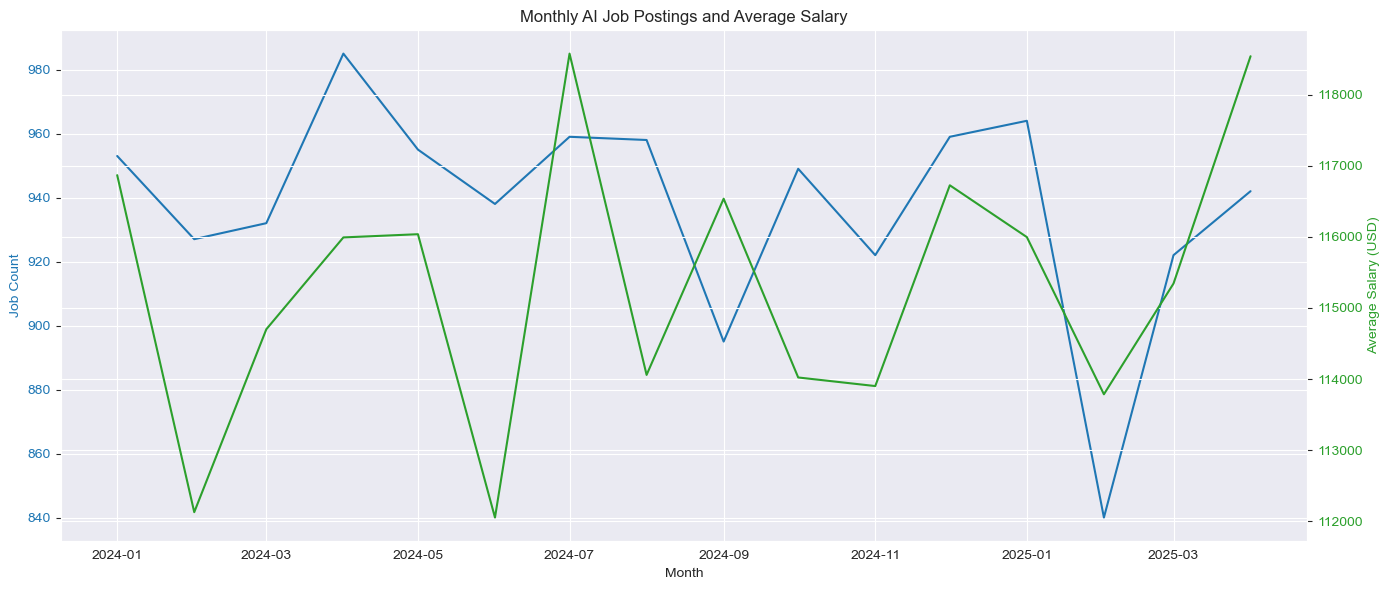

In [7]:
df["posting_date"] = pd.to_datetime(df["posting_date"], errors="coerce")
df["month"] = df["posting_date"].dt.to_period("M")
monthly_count = df.groupby("month").size()
monthly_salary = df.groupby("month")["salary_usd"].mean()

fig, ax1 = plt.subplots(figsize=(14, 6))
color1 = 'tab:blue'
ax1.set_xlabel("Month")
ax1.set_ylabel("Job Count", color=color1)
ax1.plot(monthly_count.index.to_timestamp(), monthly_count.values, color=color1, label="Job Count")
ax1.tick_params(axis='y', labelcolor=color1)
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel("Average Salary (USD)", color=color2)
ax2.plot(monthly_salary.index.to_timestamp(), monthly_salary.values, color=color2, label="Avg Salary")
ax2.tick_params(axis='y', labelcolor=color2)

plt.title("Monthly AI Job Postings and Average Salary")
fig.tight_layout()
plt.show()

In [8]:
# The number of AI job postings remains relatively stable, fluctuating between 920 and 980 per month. Average salaries show greater variation, ranging from around $112,000 to over $118,000, suggesting sensitivity to role types or company budgets. We also can find there is a significant drop in both job count and salary in early 2025 may reflect seasonal hiring slowdowns or budget resets.

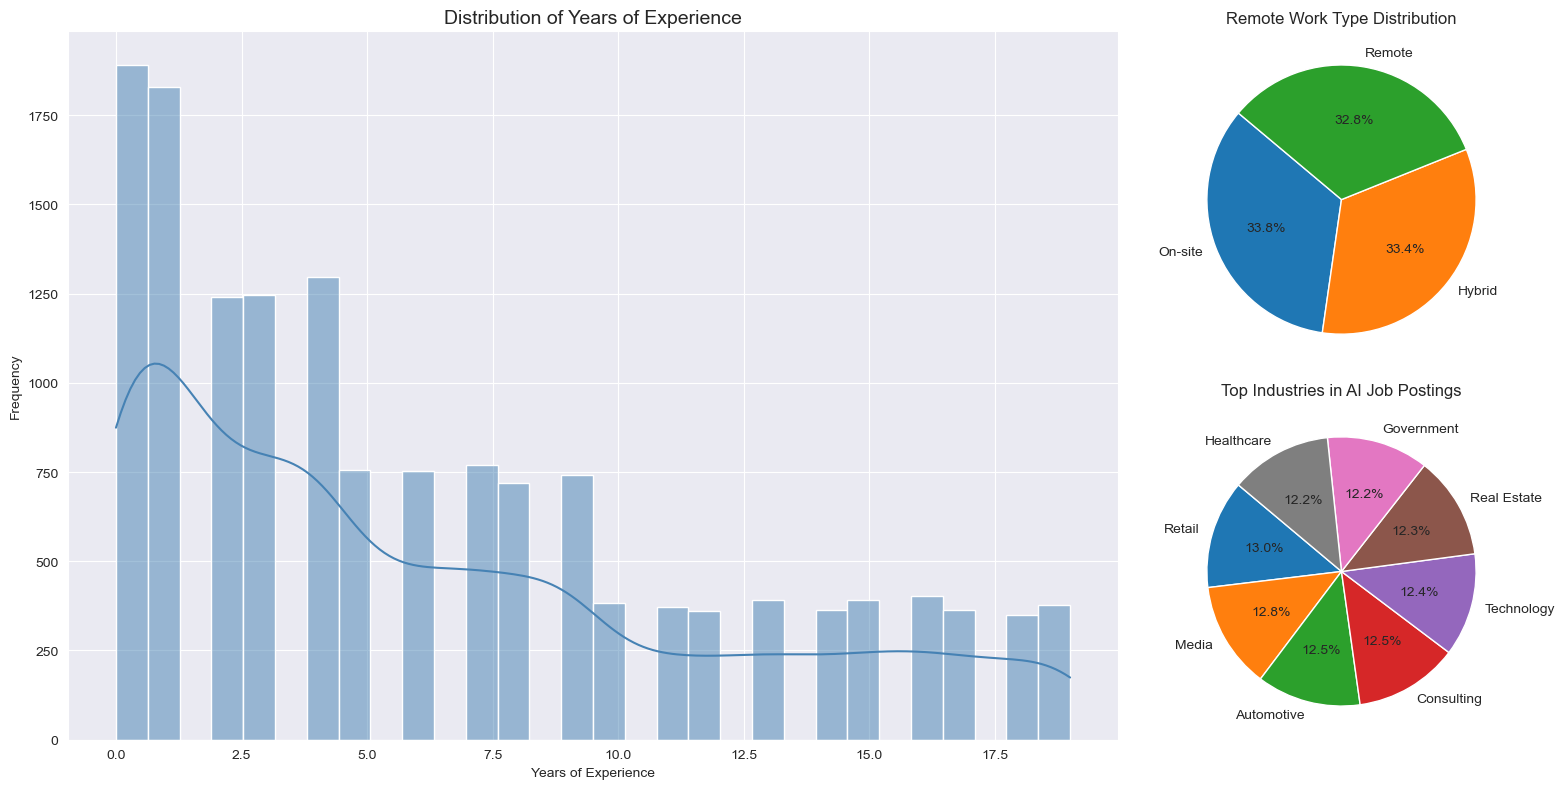

In [9]:
fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(2, 2, width_ratios=[2.5, 1])

ax0 = plt.subplot(gs[:, 0])
sns.histplot(df["years_experience"].dropna(), bins=30, kde=True, ax=ax0, color="steelblue")
ax0.set_title("Distribution of Years of Experience", fontsize=14)
ax0.set_xlabel("Years of Experience")
ax0.set_ylabel("Frequency")
remote_labels = {0: "On-site", 50: "Hybrid", 100: "Remote"}
remote_counts = df["remote_ratio"].map(remote_labels).value_counts()
ax1 = plt.subplot(gs[0, 1])
ax1.pie(remote_counts, labels=remote_counts.index, autopct="%1.1f%%", startangle=140, textprops={'fontsize': 10})
ax1.set_title("Remote Work Type Distribution", fontsize=12)
industry_counts = df["industry"].value_counts().nlargest(8)
ax2 = plt.subplot(gs[1, 1])
ax2.pie(industry_counts, labels=industry_counts.index, autopct="%1.1f%%", startangle=140, textprops={'fontsize': 10})
ax2.set_title("Top Industries in AI Job Postings", fontsize=12)

plt.tight_layout()
plt.show()

In [10]:
# The distribution shows that most AI job postings require less than 5 years of experience, indicating strong demand for junior and mid-level roles. Remote, hybrid, and on-site work types are almost evenly split, suggesting flexibility in work arrangements across the industry. Industry-wise, postings are distributed fairly evenly, with no single sector dominating, though retail, media, and technology lead slightly in share.

##### Salary Visualization

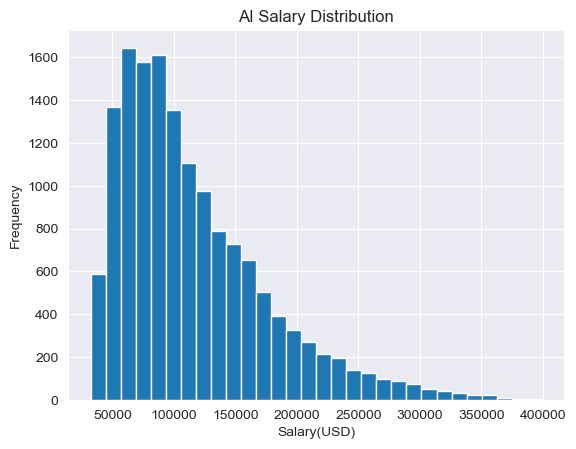

In [11]:
df['salary_usd'].dropna().plot.hist(bins=30, title='AI Salary Distribution')
plt.xlabel('Salary(USD)')
plt.savefig('salary_dist.png')

In [12]:
# The salary distribution shows a right-skewed pattern, with the majority of AI jobs offering salaries between $70,000 and $130,000. While high-paying roles above $200,000 do exist, they are relatively rare, suggesting that extremely high salaries are concentrated among a small group of senior or specialized positions.

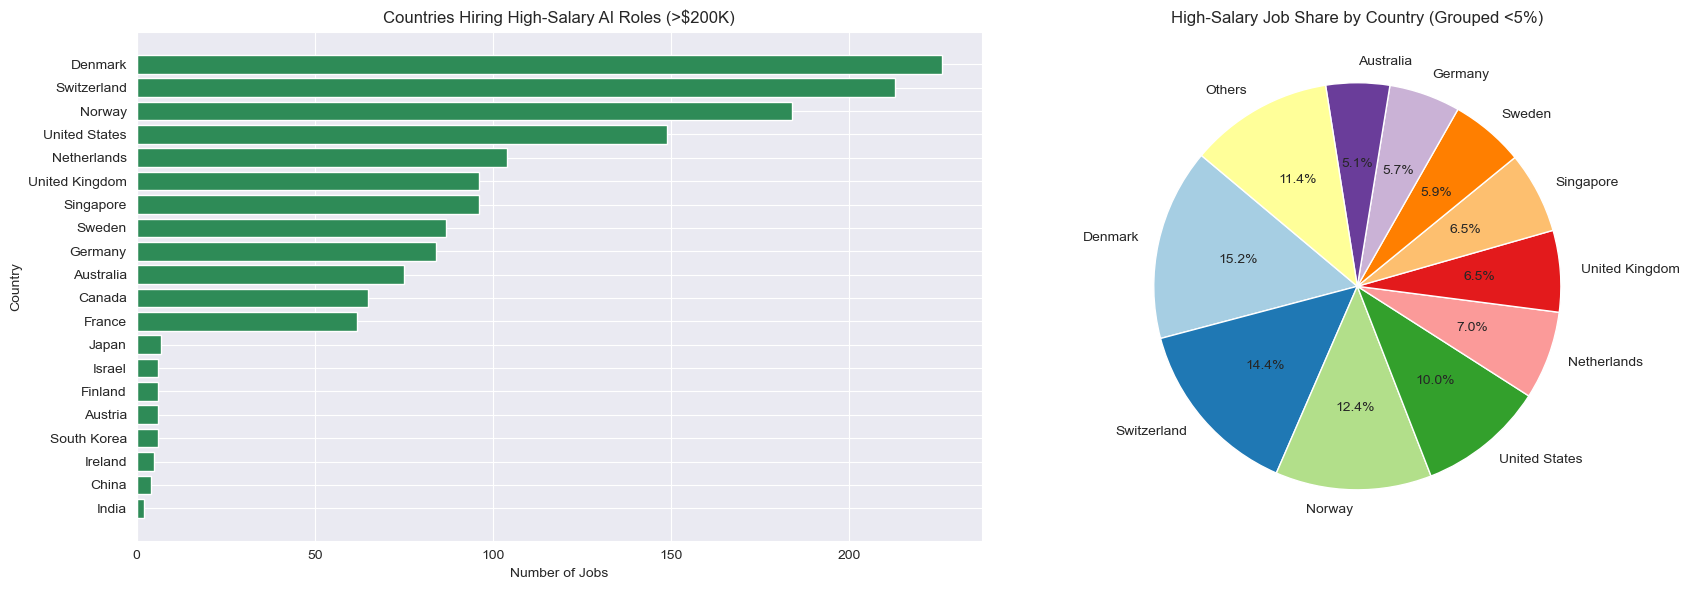

In [13]:
high_salary_df = df[df['salary_usd'] > 200000]
country_counts = high_salary_df['company_location'].value_counts()

total = country_counts.sum()
pie_data = country_counts[country_counts / total >= 0.05]
others = country_counts[country_counts / total < 0.05].sum()
pie_data["Others"] = others

bar_data = country_counts.sort_values(ascending=True)
fig, axes = plt.subplots(1, 2, figsize=(18, max(5, len(bar_data) * 0.3)))
axes[0].barh(bar_data.index, bar_data.values, color='seagreen')
axes[0].set_title("Countries Hiring High-Salary AI Roles (>$200K)")
axes[0].set_xlabel("Number of Jobs")
axes[0].set_ylabel("Country")

axes[1].pie(
    pie_data.values,
    labels=pie_data.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
axes[1].set_title("High-Salary Job Share by Country (Grouped <5%)")

plt.tight_layout()
plt.show()

In [14]:
# The data reveals that Denmark, Switzerland, and Norway lead in hiring high-salary AI roles, each accounting for more than 12% of the market share. The United States and Netherlands also show strong presence. Other countries contribute smaller shares individually, but collectively represent a significant portion of the global high-paying AI job landscape. This highlights the geographic concentration of top-tier AI salaries in a few European nations and the US.

In [15]:
map_data = country_counts.reset_index()
map_data.columns = ['company_location', 'count']

fig = px.choropleth(
    map_data,
    locations='company_location',
    locationmode='country names',
    color='count',
    color_continuous_scale='Viridis',
    title='Global Distribution of High-Salary AI Roles (>$200K)'
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    coloraxis_colorbar=dict(title="Number of Jobs")
)

fig.show()

/var/folders/sp/86lyqnpx3hj4kmbg3ll3gyf80000gn/T/ipykernel_6036/1361579003.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




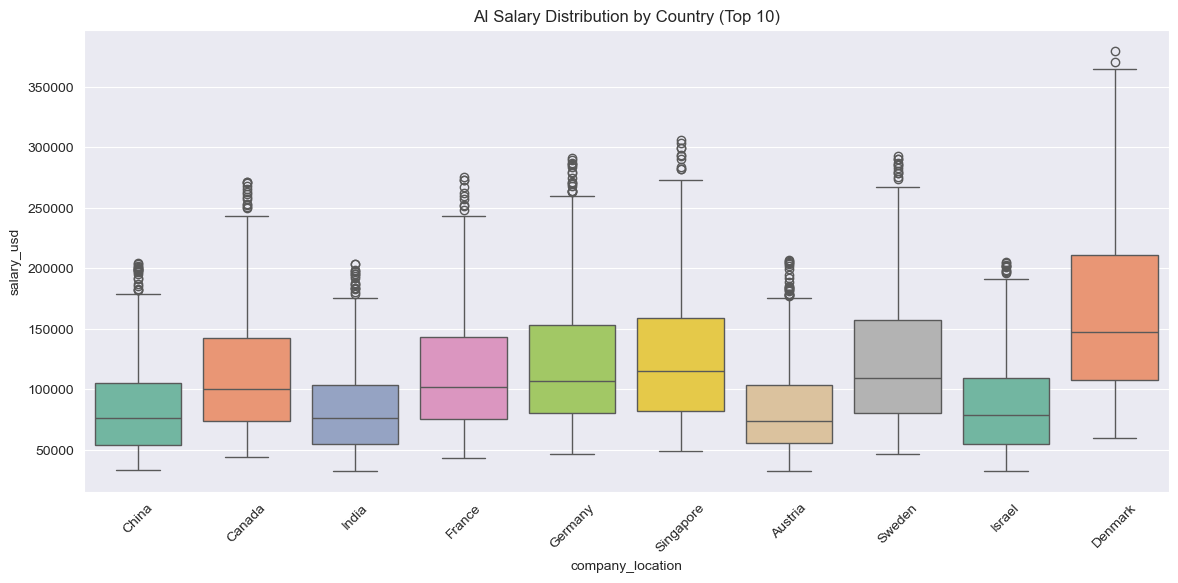

In [16]:
plt.figure(figsize=(14, 6))
top_countries = df['company_location'].value_counts().head(10).index
sns.boxplot(data=df[df['company_location'].isin(top_countries)],
            x='company_location', y='salary_usd', palette="Set2")
plt.title("AI Salary Distribution by Country (Top 10)")
plt.xticks(rotation=45)
plt.show()

In [17]:
# This box plot shows significant variation in AI salaries across countries. Denmark, Sweden, and Singapore exhibit the highest median salaries and widest ranges, indicating strong opportunities for top-paying roles. In contrast, countries like China and India have lower median salaries and tighter ranges, suggesting more concentrated mid-level compensation bands.

##### Skills Visualization

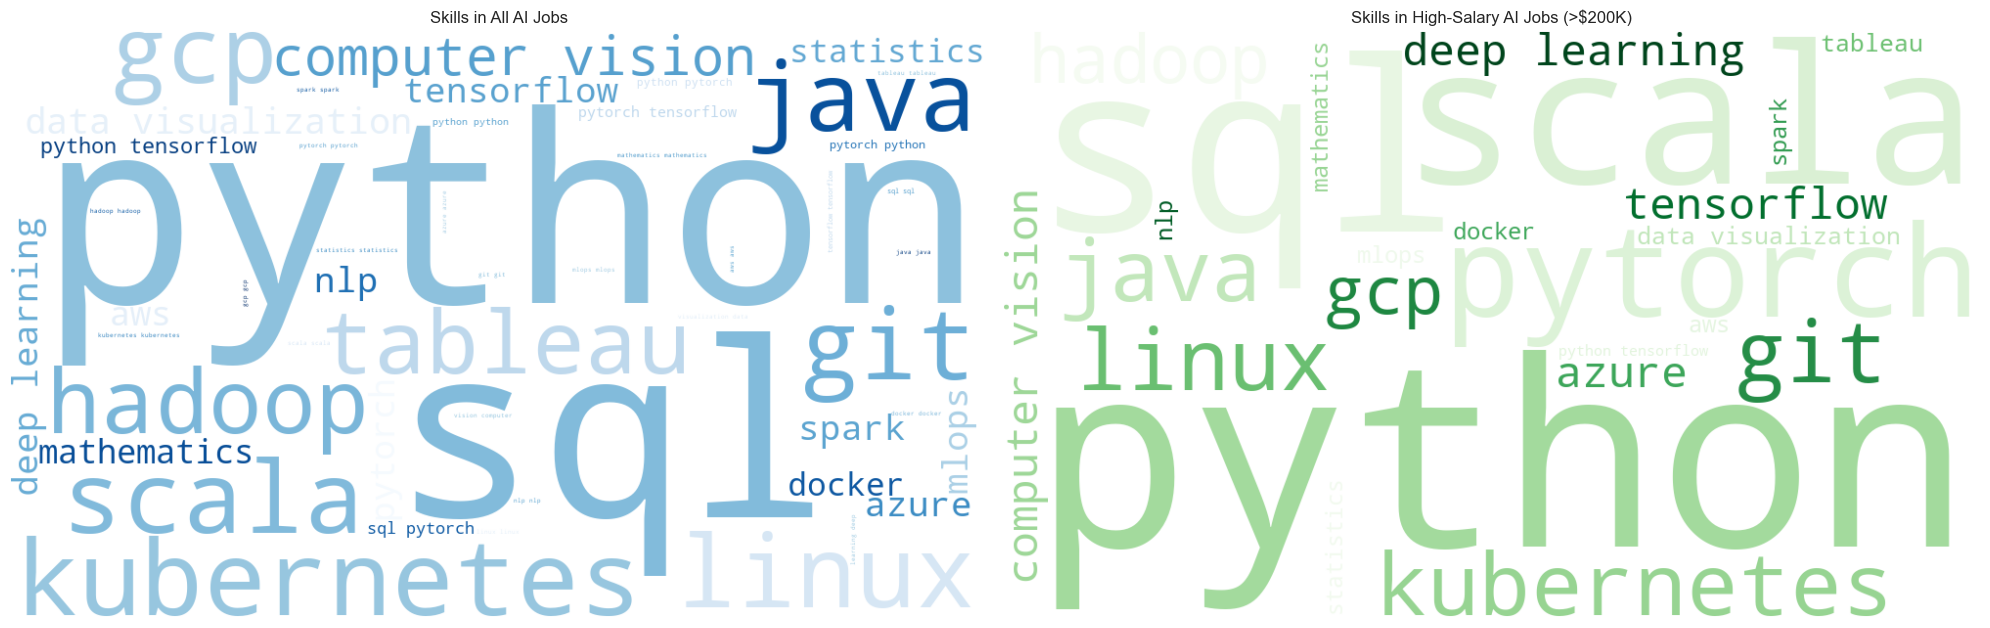

In [18]:
all_text = " ".join(df["required_skills"].dropna()).lower().replace(",", " ")
high_text = " ".join(high_salary_df["required_skills"].dropna()).lower().replace(",", " ")
wc_all = WordCloud(width=1000, height=600, background_color='white', colormap='Blues').generate(all_text)
wc_high = WordCloud(width=1000, height=600, background_color='white', colormap='Greens').generate(high_text)

fig, axs = plt.subplots(1, 2, figsize=(20, 7))
axs[0].imshow(wc_all, interpolation='bilinear')
axs[0].axis("off")
axs[0].set_title("Skills in All AI Jobs")
axs[1].imshow(wc_high, interpolation='bilinear')
axs[1].axis("off")
axs[1].set_title("Skills in High-Salary AI Jobs (>$200K)")
plt.tight_layout()
plt.show()

In [19]:
# In both AI job markets overall and high-paying roles, Python, SQL, and Kubernetes stand out as the most frequently mentioned skills. However, for jobs with salaries over $200K, PyTorch, Deep Learning, and Data Visualization appear more prominently, suggesting that expertise in these areas is especially valued in higher-paying AI positions.

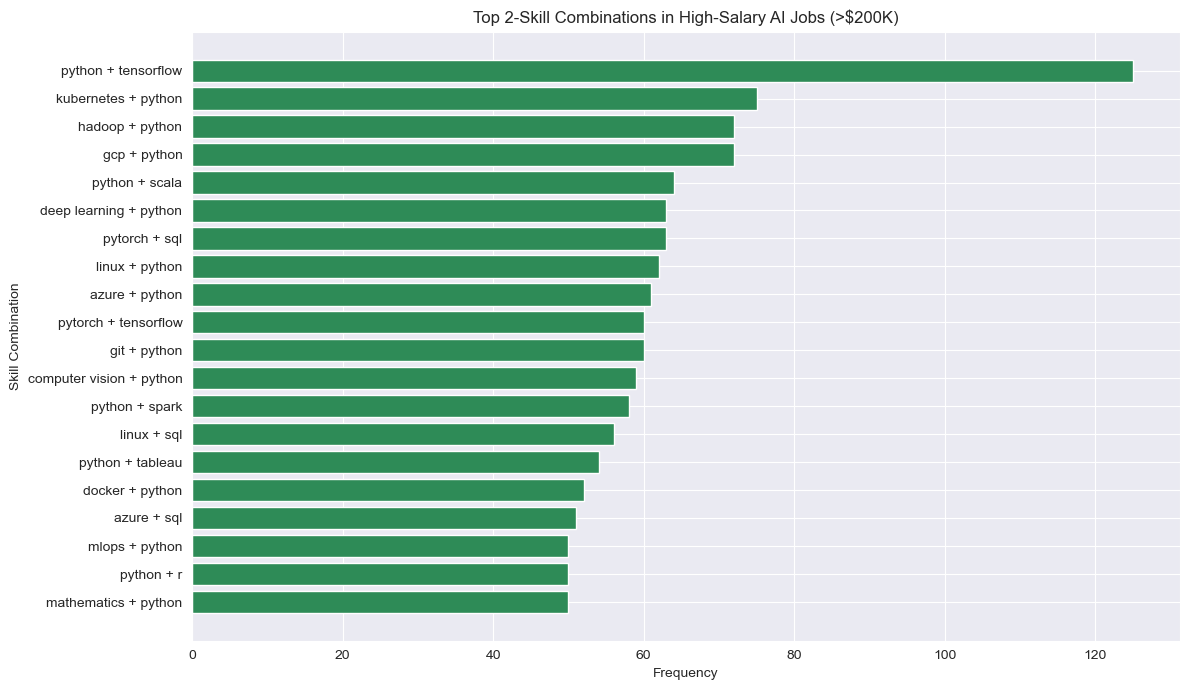

In [20]:
plt.show()
high_salary_skills = high_salary_df["required_skills"].dropna()
combo_counter = Counter()

for skills in high_salary_skills:
    skill_list = [s.strip().lower() for s in skills.split(",") if s.strip()]
    combos = combinations(sorted(set(skill_list)), 2)
    combo_counter.update(combos)

combo_df_2 = pd.DataFrame(combo_counter.items(), columns=["combo", "count"])
combo_df_2["combo"] = combo_df_2["combo"].apply(lambda x: " + ".join(x))
top_combos_2 = combo_df_2.sort_values("count", ascending=False).head(20)

plt.figure(figsize=(12, 7))
plt.barh(top_combos_2["combo"][::-1], top_combos_2["count"][::-1], color='seagreen')
plt.title("Top 2-Skill Combinations in High-Salary AI Jobs (>$200K)")
plt.xlabel("Frequency")
plt.ylabel("Skill Combination")
plt.tight_layout()
plt.show()

In [21]:
# This chart shows that Python consistently dominates top skill pairings in high-paying AI roles. Combinations like Python + TensorFlow, Kubernetes + Python, and Hadoop + Python appear most frequently, suggesting that advanced technical stacks built around Python frameworks and infrastructure tools are highly valued in the market.

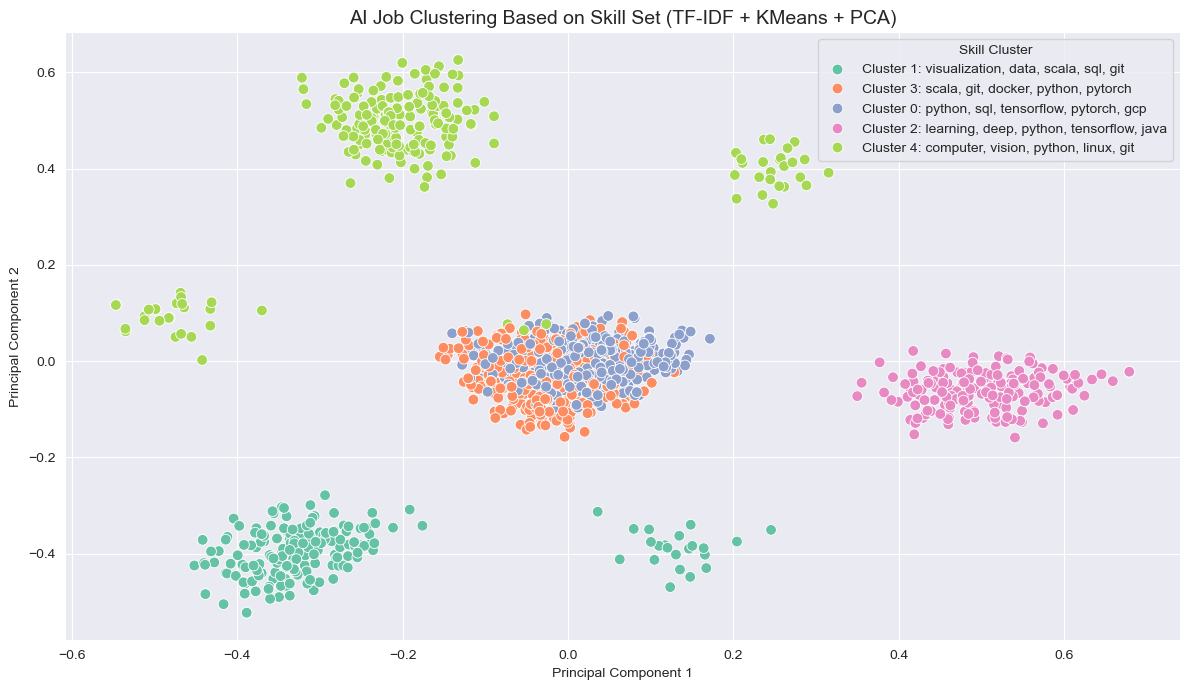

In [22]:
vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words="english")
X = vectorizer.fit_transform(high_salary_skills)

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

terms = vectorizer.get_feature_names_out()
cluster_labels = []
for i in range(k):
    center = kmeans.cluster_centers_[i]
    top_terms = np.argsort(center)[-5:][::-1]
    keywords = [terms[j] for j in top_terms]
    label = f"Cluster {i}: " + ", ".join(keywords)
    cluster_labels.append(label)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

cluster_name_map = {i: cluster_labels[i] for i in range(k)}
label_names = [cluster_name_map[c] for c in clusters]

plt.figure(figsize=(12, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=label_names, palette="Set2", s=60)
plt.title("AI Job Clustering Based on Skill Set (TF-IDF + KMeans + PCA)", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Skill Cluster", loc="best")
plt.tight_layout()
plt.show()

In [23]:
# This clustering shows distinct skill set groupings among AI roles. For example, one cluster focuses on visualization and data analysis, another on deep learning frameworks like TensorFlow and PyTorch, while others emphasize infrastructure tools such as Docker and Kubernetes. This suggests diverse subfields within AI hiring trends, each with unique technical stacks.

### Part 3: Predicting AI Job Salaries Using Random Forest

In [24]:
features = [
    'experience_level', 'employment_type', 'company_location',
    'company_size', 'employee_residence', 'remote_ratio',
    'education_required', 'years_experience', 'industry'
]

In [25]:
df_model = df[features + ['salary_usd']].dropna().copy()

categorical_cols = df_model.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

In [26]:
X = df_model[features]
y = df_model['salary_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

/var/folders/sp/86lyqnpx3hj4kmbg3ll3gyf80000gn/T/ipykernel_6036/2477464744.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




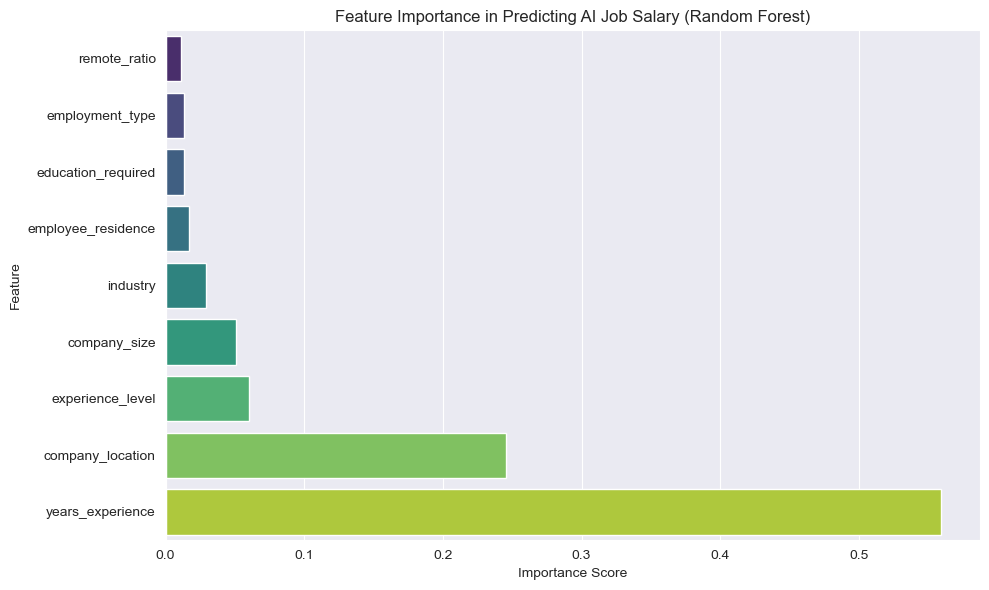

In [27]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance in Predicting AI Job Salary (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [28]:
# This feature importance chart shows that years of experience is by far the strongest predictor of AI job salaries, followed by company location. Other variables like experience level, company size, and industry also contribute but to a much lesser degree, while factors such as remote ratio and employment type have minimal impact.

In [29]:
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {rmse:.2f}")

R² Score: 0.8664
Mean Squared Error: 22230.29


In [30]:
import joblib
joblib.dump(rf, 'UI_Test/salary_prediction_model.pkl')

joblib.dump(label_encoders, 'UI_Test/label_encoders.pkl')

['UI_Test/label_encoders.pkl']

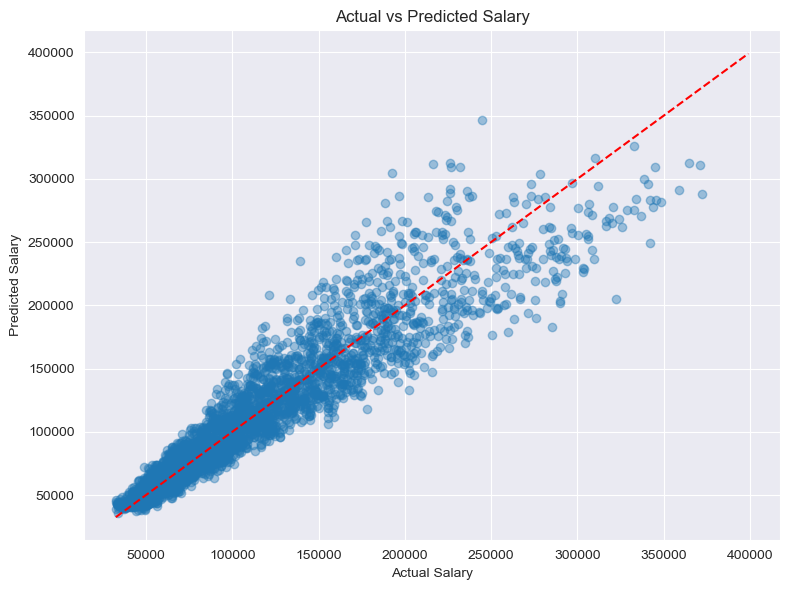

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.tight_layout()
plt.show()

In [32]:
# This scatter plot shows the model’s predicted salaries versus actual salaries, with an R² score of 0.8664. The predictions align closely with the ideal diagonal (red dashed line), indicating strong model performance in predicting AI job salaries.

In [33]:
base_sample = {
    'experience_level': 'SE',
    'employment_type': 'FT',
    'company_location': 'United States',
    'company_size': 'M',
    'employee_residence': 'United States',
    'remote_ratio': 100,
    'education_required': 'Bachelor',
    'years_experience': 7,
    'industry': 'Media'
}

In [34]:
remote_values = [0, 50, 100]
education_values = ['Bachelor', 'Master', 'PhD']
company_sizes = ['S', 'M', 'L']
industries = ['Media', 'Retail', 'Energy']

samples = []
for remote in remote_values:
    for edu in education_values:
        for size in company_sizes:
            for industry in industries:
                sample = base_sample.copy()
                sample['remote_ratio'] = remote
                sample['education_required'] = edu
                sample['company_size'] = size
                sample['industry'] = industry
                samples.append(sample)
sample_df = pd.DataFrame(samples)

/var/folders/sp/86lyqnpx3hj4kmbg3ll3gyf80000gn/T/ipykernel_6036/2344838064.py:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




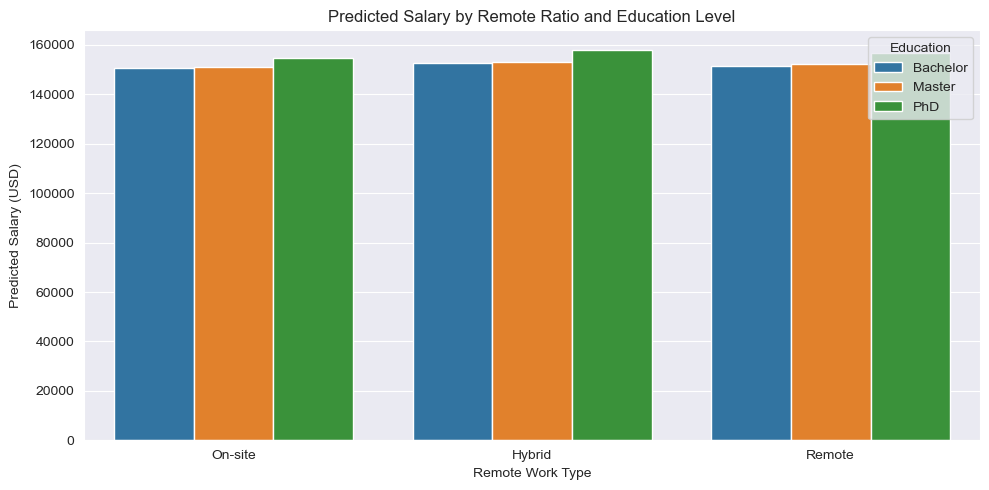

In [35]:
for col in sample_df.columns:
    if col in label_encoders:
        sample_df[col] = label_encoders[col].transform(sample_df[col])
sample_df['predicted_salary'] = rf.predict(sample_df)

sample_df['remote_ratio'] = sample_df['remote_ratio'].replace({0: 'On-site', 50: 'Hybrid', 100: 'Remote'})
sample_df['education_required'] = label_encoders['education_required'].inverse_transform(sample_df['education_required'])
sample_df['company_size'] = label_encoders['company_size'].inverse_transform(sample_df['company_size'])
sample_df['industry'] = label_encoders['industry'].inverse_transform(sample_df['industry'])

plt.figure(figsize=(10, 5))
sns.barplot(
    data=sample_df,
    x='remote_ratio',
    y='predicted_salary',
    hue='education_required',
    ci=None
)
plt.title("Predicted Salary by Remote Ratio and Education Level")
plt.ylabel("Predicted Salary (USD)")
plt.xlabel("Remote Work Type")
plt.legend(title='Education')
plt.tight_layout()
plt.show()

/var/folders/sp/86lyqnpx3hj4kmbg3ll3gyf80000gn/T/ipykernel_6036/2025347885.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




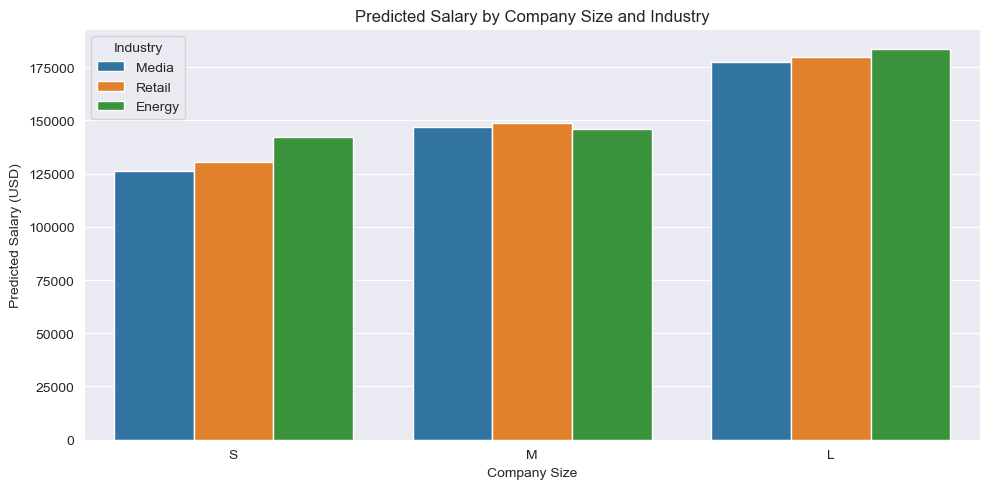

In [36]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=sample_df,
    x='company_size',
    y='predicted_salary',
    hue='industry',
    ci=None
)
plt.title("Predicted Salary by Company Size and Industry")
plt.ylabel("Predicted Salary (USD)")
plt.xlabel("Company Size")
plt.legend(title='Industry')
plt.tight_layout()
plt.show()

In [37]:
# These simulated results show how predicted salaries vary across different scenarios. In the first chart, higher remote ratios and higher education levels (especially PhDs) correlate with slightly higher predicted salaries, suggesting that advanced education and flexible work options may lead to modest salary boosts. In the second chart, larger companies consistently offer higher predicted salaries across industries, and differences between industries are relatively minor compared to the gap driven by company size. This suggests company size plays a stronger role in salary differences than industry type in this model.